In [4]:
import iris
import iris.plot as iplt
import iris.quickplot as qplt
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import cf_units
import matplotlib.colors as colors
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy.feature as cfeat
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
from matplotlib.cm import ScalarMappable
import matplotlib


# read in netcdf files
dry_cold_file = '/Users/livnorth/Internship_with_Hugo/Initial Plots/240c.nc' 
earth_like_file = '/Users/livnorth/Internship_with_Hugo/Initial Plots/280c.nc' 
hot_file = '/Users/livnorth/Internship_with_Hugo/Initial Plots/340c.nc'

# convert files to temp cubes
dry_cold_cube = iris.load('/Users/livnorth/Internship_with_Hugo/Initial Plots/240c.nc', 'temp')[0]
earth_like_cube = iris.load('/Users/livnorth/Internship_with_Hugo/Initial Plots/280c.nc', 'temp')[0]
hot_cube = iris.load('/Users/livnorth/Internship_with_Hugo/Initial Plots/340c.nc', 'temp')[0]

# convert files to wind cubes
#cold_uwind = iris.load('/Users/livnorth/Internship with Hugo/Initial Plots/240c.nc', 'eastward_wind')[0]
#cold_vwind = iris.load('/Users/livnorth/Internship with Hugo/Initial Plots/240c.nc', 'northward_wind')[1]
#earth_uwind = iris.load('/Users/livnorth/Internship with Hugo/Initial Plots/280c.nc', 'eastward_wind')[0]
#earth_vwind = iris.load('/Users/livnorth/Internship with Hugo/Initial Plots/280c.nc', 'northward_wind')[1]
#hot_uwind = iris.load('/Users/livnorth/Internship with Hugo/Initial Plots/340c.nc', 'eastward_wind')[0]
#hot_vwind = iris.load('/Users/livnorth/Internship with Hugo/Initial Plots/340c.nc', 'northward_wind')[1]

# format font for plots
font = {'size'   : 12}
matplotlib.rc('font', **font)

/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/fileformats/_nc_load_rules/helpers.py:918: _WarnComboIgnoringCfLoad: Ignoring invalid units 'level' on netCDF variable 'hybrid_ht_3'.
  warnings.warn(
/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/fileformats/_nc_load_rules/helpers.py:918: _WarnComboIgnoringCfLoad: Ignoring invalid units 'level' on netCDF variable 'surface'.
  warnings.warn(
/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/fileformats/_nc_load_rules/helpers.py:918: _WarnComboIgnoringCfLoad: Ignoring invalid units 'level' on netCDF variable 'pseudo'.
  warnings.warn(
/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/fileformats/_nc_load_rules/helpers.py:918: _WarnComboIgnoringCfLoad: Ignoring invalid units 'level' on netCDF variable 'hybrid_ht_1'.
  warnings.warn(
/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/fileformats/_nc_load_rules/helpers.py:918: _WarnComboIgnoringCfLoad: Ignoring invalid units 'level' 

### Print cubes

In [2]:
earth_like_cube

<iris 'Cube' of surface_temperature / (K) (t: 92; Surface: 1; latitude: 90; longitude: 144)>

In [8]:
print(earth_like_cube[0,0,:,:].data)
np.savetxt("init_surf_temp_280c.csv", earth_like_cube[0,0,:,:].data, 
              delimiter = ",")

[[204.15277 204.16283 204.16489 ... 204.06984 204.10623 204.1341 ]
 [213.69121 213.70189 213.67995 ... 213.4848  213.58165 213.65372]
 [222.62834 222.61783 222.58052 ... 222.40102 222.5202  222.6006 ]
 ...
 [226.28928 226.2864  226.24092 ... 226.07356 226.18613 226.25067]
 [217.944   217.94965 217.9305  ... 217.77475 217.8551  217.91153]
 [209.52481 209.5297  209.52654 ... 209.46567 209.49364 209.51303]]


In [3]:
dry_cold_cube

<iris 'Cube' of surface_temperature / (K) (t: 92; Surface: 1; latitude: 90; longitude: 144)>

In [4]:
hot_cube

<iris 'Cube' of surface_temperature / (K) (t: 92; Surface: 1; latitude: 90; longitude: 144)>

### Define function for plotting surface temp map

In [2]:
def plot_surface_temp_map(cube_slice,title,lim1,lim2,step):

    plt.figure(figsize=(12, 6),dpi=150) 
    
# read in 
    data=cube_slice.data
    lon=cube_slice.coord('longitude').points
    lat=cube_slice.coord('latitude').points

# define ticks
    ticks=np.arange(lim1,lim2,step) 

# fix longitude
    new_lon=[]
    for k in range(len(lon)):
        if lon[k]>180:
            temp=lon[k]-360
            new_lon=np.append(new_lon,temp)
        else:
            new_lon=np.append(new_lon,lon[k])

    data_1=data[:,0:72]
    data_2=data[:,72:]
    data_21=np.hstack((data_2,data_1))
    new_lon_1=new_lon[0:72]
    new_lon_2=new_lon[72:]
    new_lon_21 = np.hstack((new_lon_2, new_lon_1))
    data_final=data_21
    new_lon_final=new_lon_21

# plot 
    ax = plt.axes(projection=ccrs.PlateCarree())
    x=plt.contourf(new_lon_final,lat,data_final,cmap='bwr',levels=ticks,norm=colors.TwoSlopeNorm(vmin=lim1, vcenter=273, vmax=lim2), extend='both')
    plt.title(title)

# fix ticks
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

# add a color bar
    cbar = plt.colorbar(x,ax=ax, label='Temperature (K)')  #ScalarMappable(cmap=cmap), ax=ax, orientation='vertical', label=bar_label)
    cbar.set_ticks(ticks=ticks)
    for label in cbar.ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
#cbar.set_ticklabels(tick_labels)
    ax.set_aspect('auto')

### Call function for each dataset

/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 't', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 't'. Ignoring bounds.
  warnings.warn(


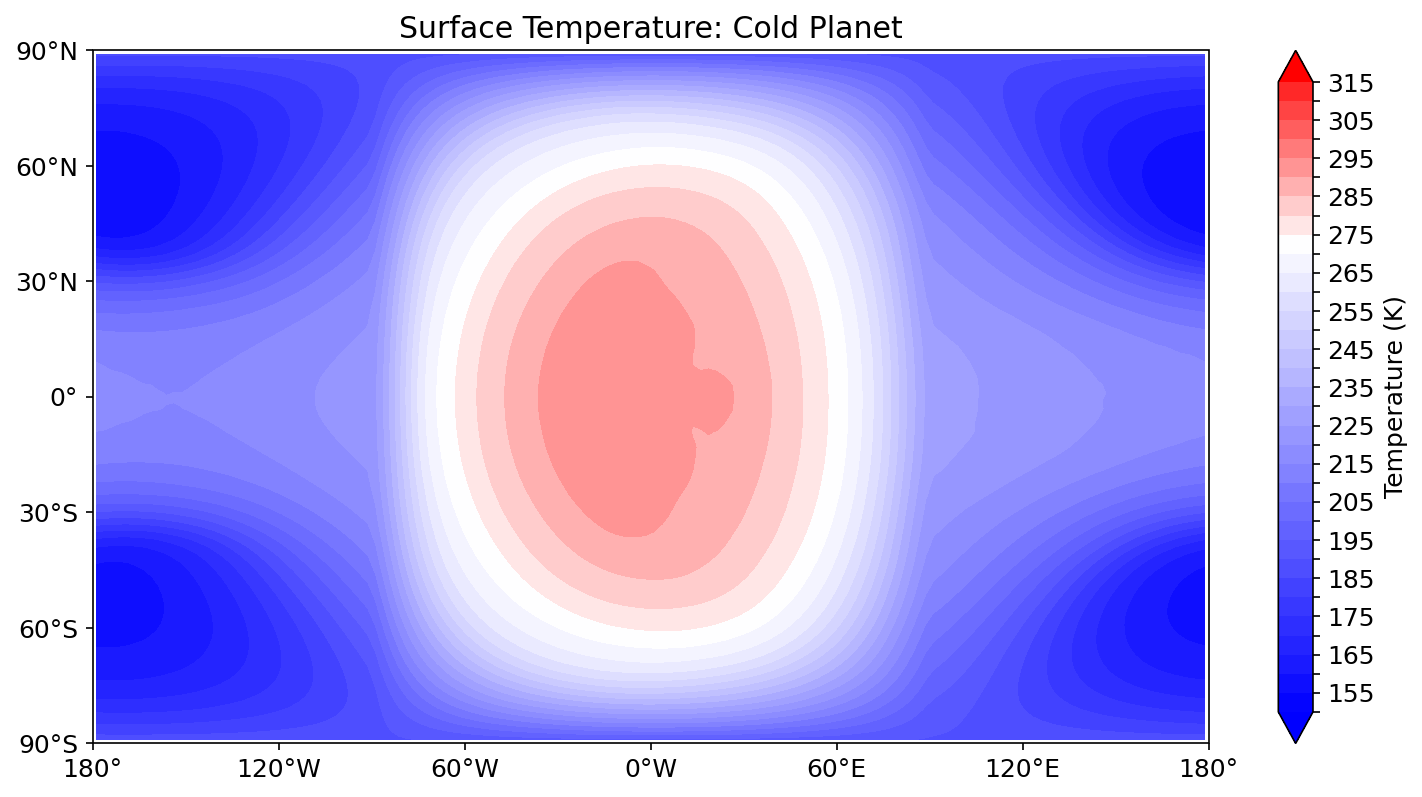

In [58]:
plot_surface_temp_map(dry_cold_cube,'Surface Temperature: Cold Planet',150,320,5)
#plt.savefig('240c surface temp', bbox_inches='tight', dpi=300)

/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 't', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 't'. Ignoring bounds.
  warnings.warn(


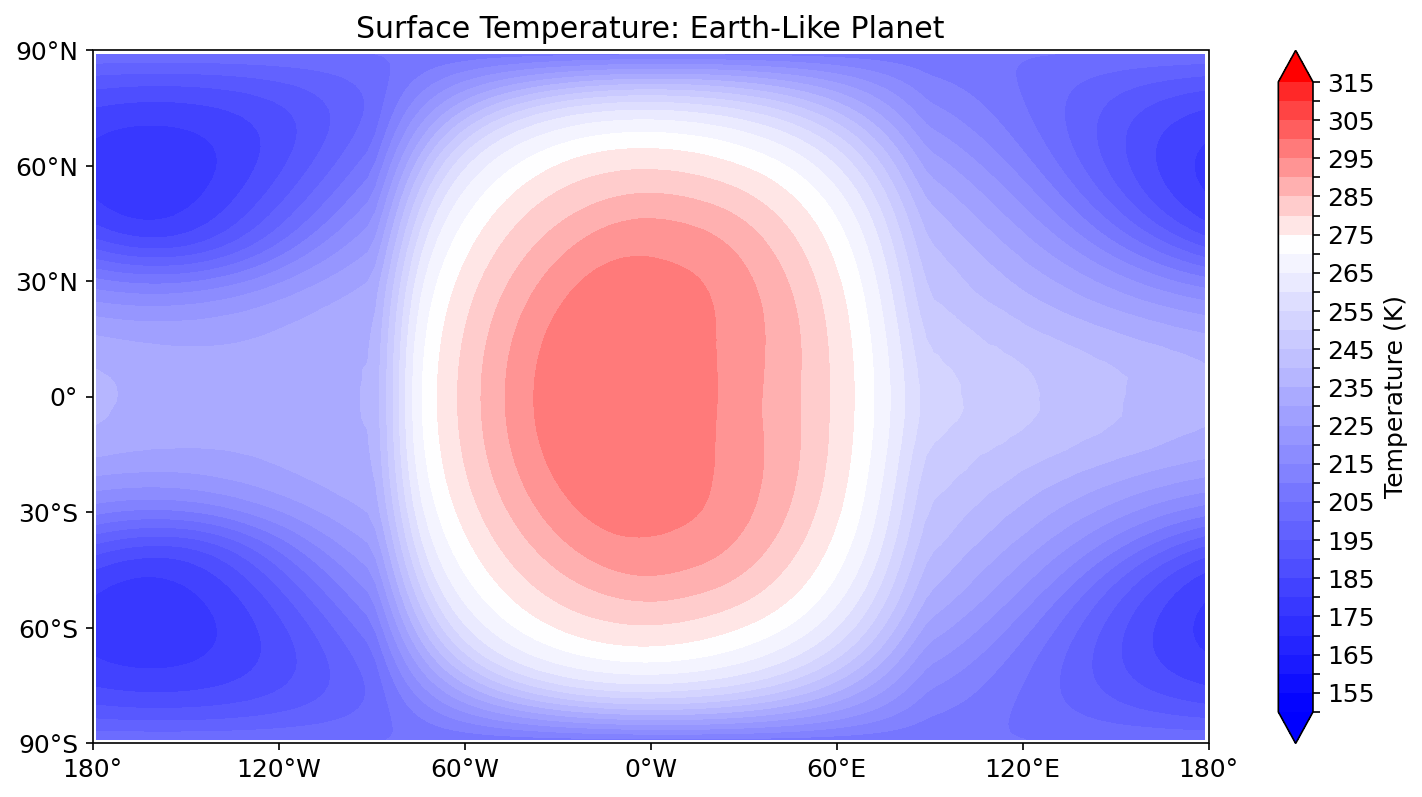

In [59]:
plot_surface_temp_map(earth_like_cube,'Surface Temperature: Earth-Like Planet',150,320,5)
#plt.savefig('280c surface temp', bbox_inches='tight', dpi=300)

/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 't', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 't'. Ignoring bounds.
  warnings.warn(


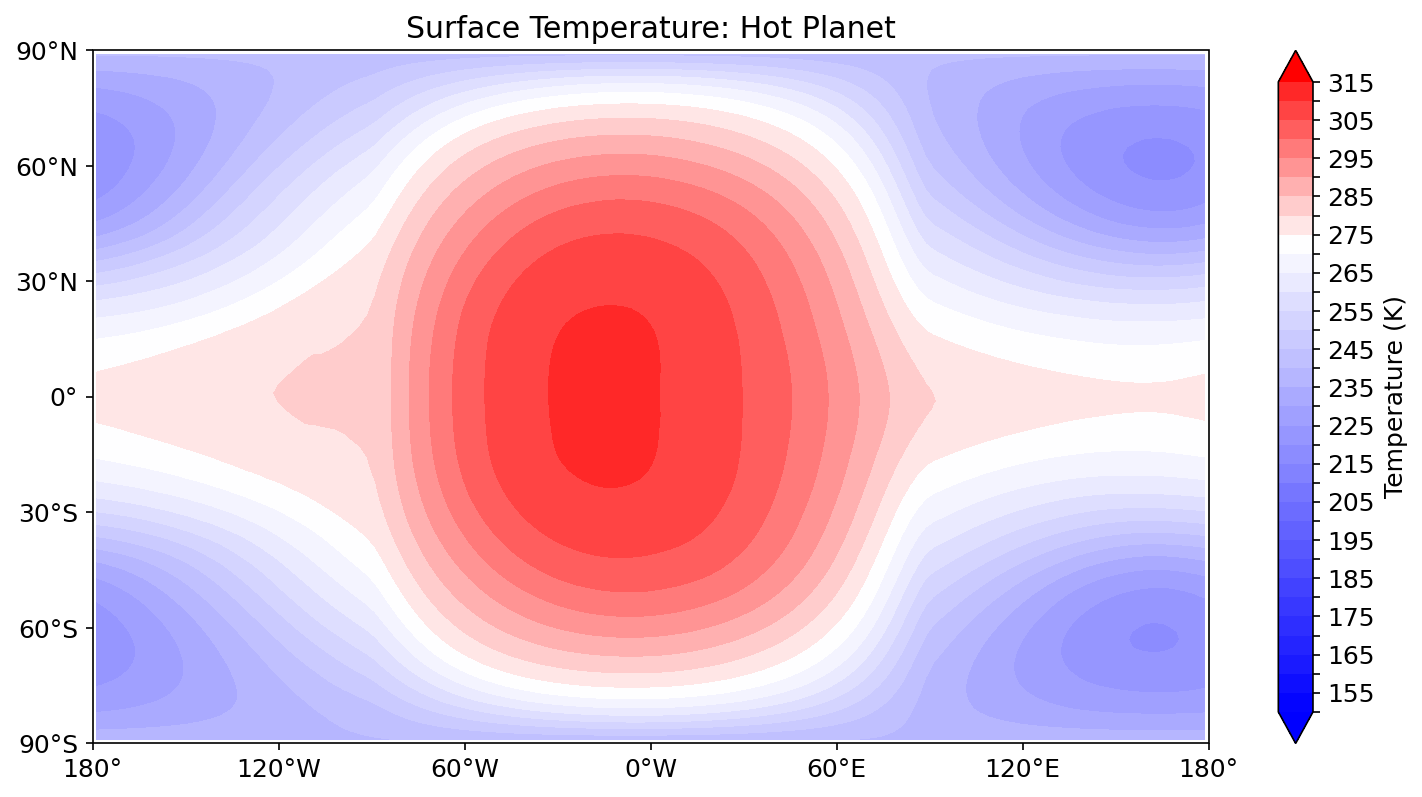

In [60]:
plot_surface_temp_map(hot_cube,'Surface Temperature: Hot Planet',150,320,5)
#plt.savefig('340c surface temp', bbox_inches='tight', dpi=300)

### Set the coordinate bounds

In [3]:
dry_cold_cube.coord('latitude').guess_bounds()
dry_cold_cube.coord('longitude').guess_bounds()
earth_like_cube.coord('latitude').guess_bounds()
earth_like_cube.coord('longitude').guess_bounds()
hot_cube.coord('latitude').guess_bounds()
hot_cube.coord('longitude').guess_bounds()

### Compute area-weighted mean surface temps

In [5]:
# Find grid areas for data
temp_dry_grid_areas = iris.analysis.cartography.area_weights(dry_cold_cube) #dry planet
temp_earth_grid_areas = iris.analysis.cartography.area_weights(earth_like_cube) #earth-like planet
temp_hot_grid_areas = iris.analysis.cartography.area_weights(hot_cube) #hot planet


# Perform the area-weighted mean for each of the datasets using the computed grid-box areas.
temp_dry_mean = dry_cold_cube.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=temp_dry_grid_areas) #dry planet

temp_earth_mean = earth_like_cube.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=temp_earth_grid_areas) #earth-like planet

temp_hot_mean = hot_cube.collapsed(['latitude', 'longitude'], iris.analysis.MEAN, weights=temp_hot_grid_areas) #hot planet

### Plot global mean surface temp for each dataset with lines of best fit

In [17]:
month = list(range(1,93))
ticks = ['1','2','3','4','5','6','7','8','9','10','11','12']

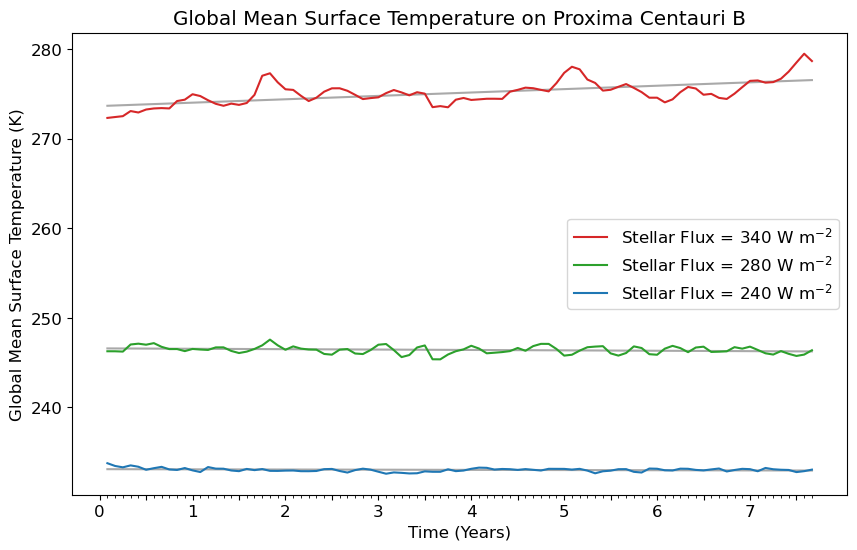

In [43]:
a, b = np.polyfit(month, temp_hot_mean.data, 1)
c, d = np.polyfit(month, temp_earth_mean.data, 1)
e, f = np.polyfit(month, temp_dry_mean.data, 1)

plt.figure(figsize=(10,6))

plt.plot(month, a*month+b, color='darkgrey')   
plt.plot(month, temp_hot_mean.data, label='Stellar Flux = 340 W m$^{-2}$', color='tab:red', linestyle='-') #hot planet

plt.plot(month, c*month+d, color='darkgrey')  
plt.plot(month, temp_earth_mean.data, label='Stellar Flux = 280 W m$^{-2}$', color='tab:green', linestyle='-') #earth-like planet 

plt.plot(month, e*month+f, color='darkgrey')  
plt.plot(month, temp_dry_mean.data, label='Stellar Flux = 240 W m$^{-2}$', color='tab:blue', linestyle='-') #dry planet 


plt.xticks([0,6,12,18,24,30,36,42,48,54,60,66,72,78,84,90], [0,None,1,None,2,None,3,None,4,None,5,None,6,None,7,None])
plt.xticks(month, [], minor=True)

plt.legend(loc='center right')
plt.title('Global Mean Surface Temperature on Proxima Centauri B')
plt.ylabel('Global Mean Surface Temperature (K)')
plt.xlabel('Time (Years)')

plt.savefig('global mean temp graph', bbox_inches='tight', dpi=300)

### Calculate difference between hot and cold cube

In [60]:
T_diff = hot_cube - earth_like_cube

In [61]:
# temp difference at different times
T_diff_1 = T_diff[11,0,:,:] # 1 year
T_diff_3 = T_diff[35,0,:,:] # 3 years
T_diff_5 = T_diff[59,0,:,:] # 5 years
T_diff_7 = T_diff[83,0,:,:] # 7 years

In [71]:
print(np.max(T_diff_5.data))
print(np.min(T_diff_7.data))

91.38353
-8.484238


### Define new function for temp difference map

In [73]:
def plot_surface_temp_diff_map(cube_slice,title,lim1,lim2,step):

    plt.figure(figsize=(12, 6),dpi=150) 
    
# read in 
    data=cube_slice.data
    lon=cube_slice.coord('longitude').points
    lat=cube_slice.coord('latitude').points

# define ticks
    ticks=np.arange(lim1,lim2,step) 

# fix longitude
    new_lon=[]
    for k in range(len(lon)):
        if lon[k]>180:
            temp=lon[k]-360
            new_lon=np.append(new_lon,temp)
        else:
            new_lon=np.append(new_lon,lon[k])

    data_1=data[:,0:72]
    data_2=data[:,72:]
    data_21=np.hstack((data_2,data_1))
    new_lon_1=new_lon[0:72]
    new_lon_2=new_lon[72:]
    new_lon_21 = np.hstack((new_lon_2, new_lon_1))
    data_final=data_21
    new_lon_final=new_lon_21

# plot 
    ax = plt.axes(projection=ccrs.PlateCarree())
    x=plt.contourf(new_lon_final,lat,data_final,cmap='bwr',levels=ticks,norm=colors.TwoSlopeNorm(vmin=lim1, vcenter=0, vmax=lim2), extend='both')
    plt.title(title)

# fix ticks
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

# add a color bar
    cbar = plt.colorbar(x,ax=ax, label='Temperature Difference (K)')  #ScalarMappable(cmap=cmap), ax=ax, orientation='vertical', label=bar_label)
    cbar.set_ticks(ticks=ticks)
    for label in cbar.ax.yaxis.get_ticklabels()[::2]:
        label.set_visible(False)
#cbar.set_ticklabels(tick_labels)
    ax.set_aspect('auto')

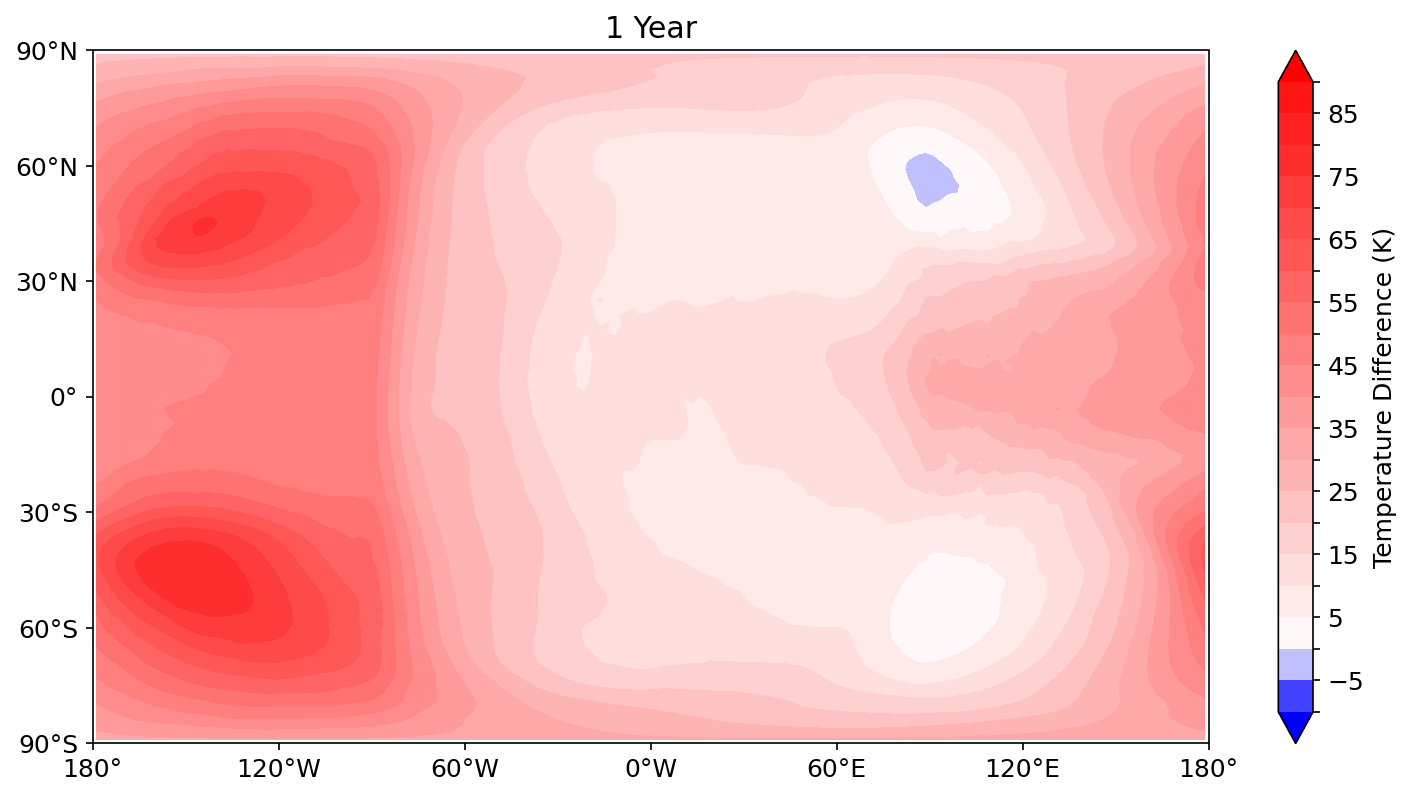

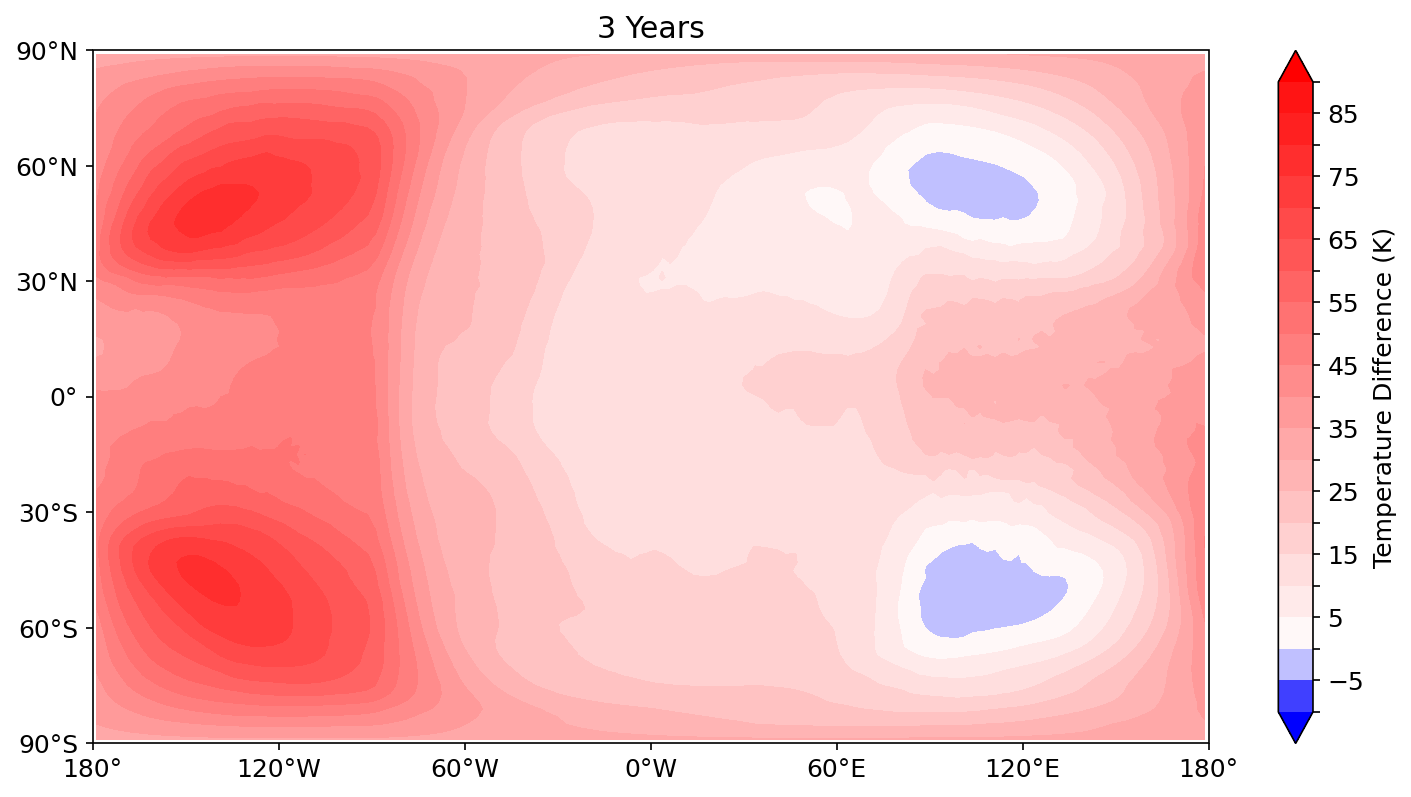

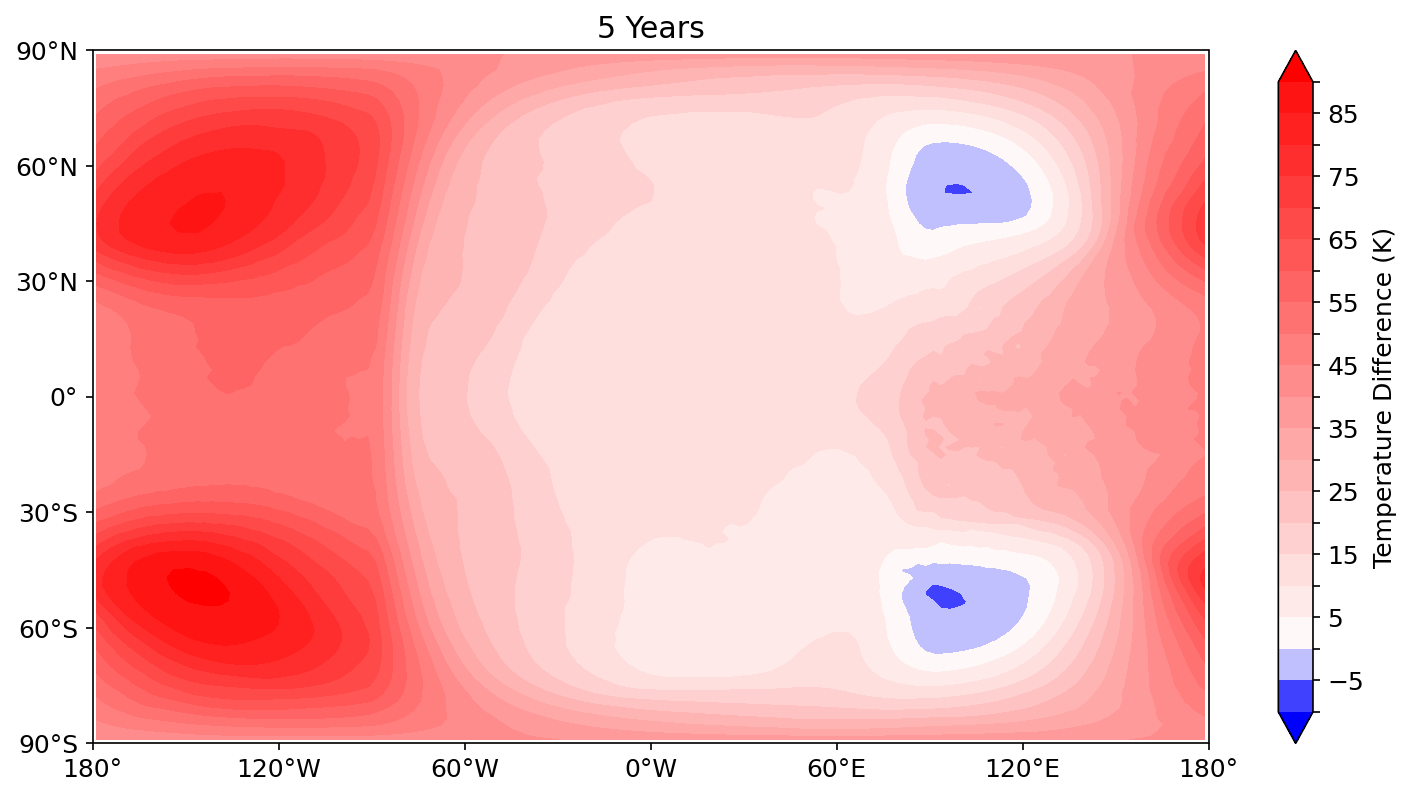

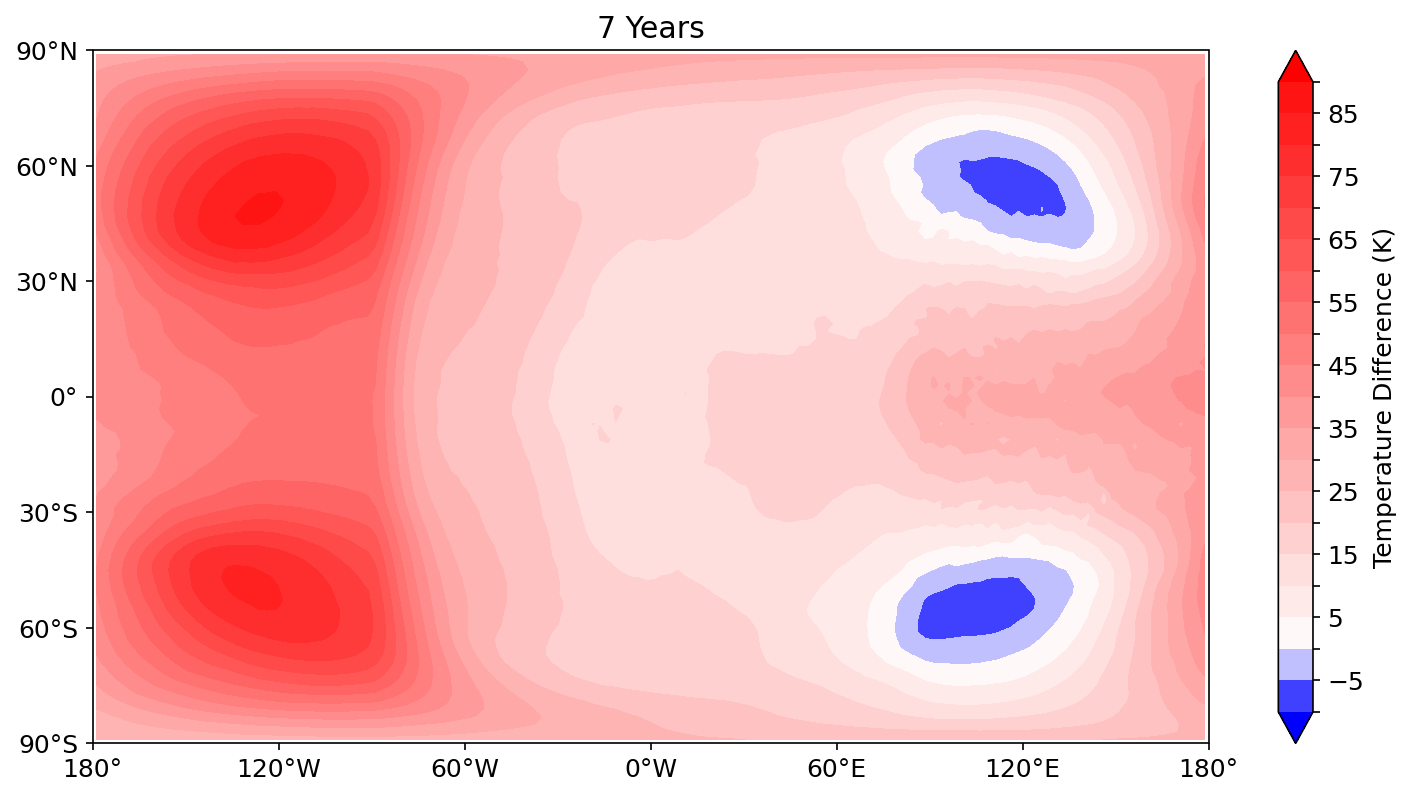

In [76]:
plot_surface_temp_diff_map(T_diff_1,'1 Year',-10,95,5)
plot_surface_temp_diff_map(T_diff_3,'3 Years',-10,95,5)
plot_surface_temp_diff_map(T_diff_5,'5 Years',-10,95,5)
plot_surface_temp_diff_map(T_diff_7,'7 Years',-10,95,5)

### Plot wind vectors over temp map

In [39]:
def plot_surface_temp_wind_map(temp,uwind,vwind,title,lim1,lim2,step):

    fig=plt.figure(figsize=(12, 6),dpi=150) 
    
# read in 
    data=temp.data
    lon=temp.coord('longitude').points
    lat=temp.coord('latitude').points

# define ticks
    ticks=np.arange(lim1,lim2,step) 

# fix longitude
    new_lon=[]
    for k in range(len(lon)):
        if lon[k]>180:
            temp=lon[k]-360
            new_lon=np.append(new_lon,temp)
        else:
            new_lon=np.append(new_lon,lon[k])

    data_1=data[:,0:72]
    data_2=data[:,72:]
    data_21=np.hstack((data_2,data_1))
    new_lon_1=new_lon[0:72]
    new_lon_2=new_lon[72:]
    new_lon_21 = np.hstack((new_lon_2, new_lon_1))
    data_final=data_21
    new_lon_final=new_lon_21



# plot 
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    x=plt.contourf(new_lon_final,lat,data_final,cmap='bwr',levels=ticks,norm=colors.TwoSlopeNorm(vmin=lim1, vcenter=273, vmax=lim2), extend='both')
    plt.title(title)

# fix ticks
    ax.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)

# add a color bar
    cbar = plt.colorbar(x,ax=ax, label='Temperature (K)')  #ScalarMappable(cmap=cmap), ax=ax, orientation='vertical', label=bar_label)
    cbar.set_ticks(ticks=ticks)
    for label in cbar.ax.yaxis.get_ticklabels()[1::2]:
        label.set_visible(False)
#cbar.set_ticklabels(tick_labels)
    #ax.set_aspect('auto')

# plot quivers
    plt.subplots_adjust(bottom=0.05)
    q=iplt.quiver(uwind[::5,::5], vwind[::5,::5], pivot="middle") #[::5,::5]
    ax.quiverkey(q, X=0.47, Y=-0.14, U=5, label='5 m s$^{-1}$', labelpos='E', transform=fig.transFigure)

In [31]:
cold_uwind_regrid = cold_uwind.regrid(cold_vwind, iris.analysis.Linear())
earth_uwind_regrid = earth_uwind.regrid(earth_vwind, iris.analysis.Linear())
hot_uwind_regrid = hot_uwind.regrid(hot_vwind, iris.analysis.Linear())

/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 't', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 't'. Ignoring bounds.
  warnings.warn(
/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 't', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 't'. Ignoring bounds.
  warnings.warn(
/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 't', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 't'. Ignoring bounds.


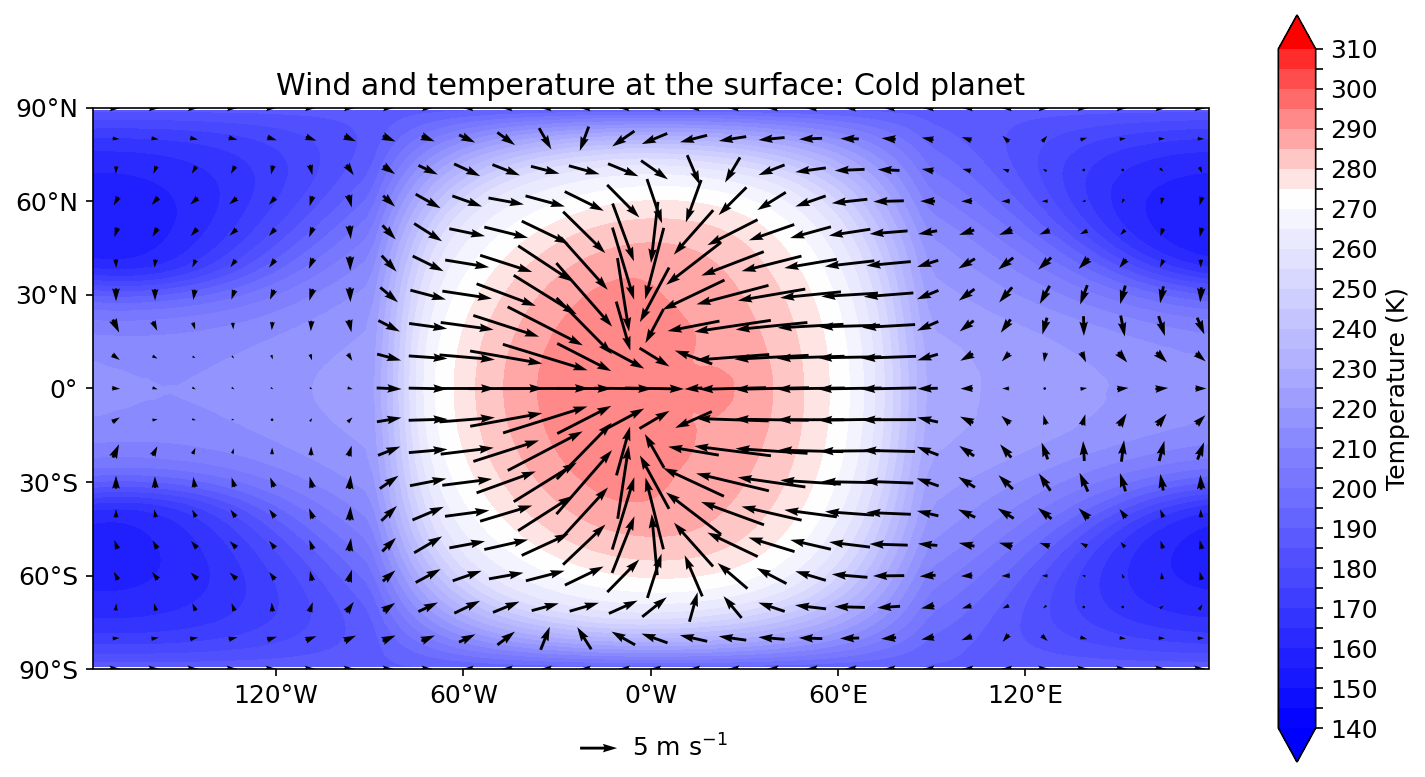

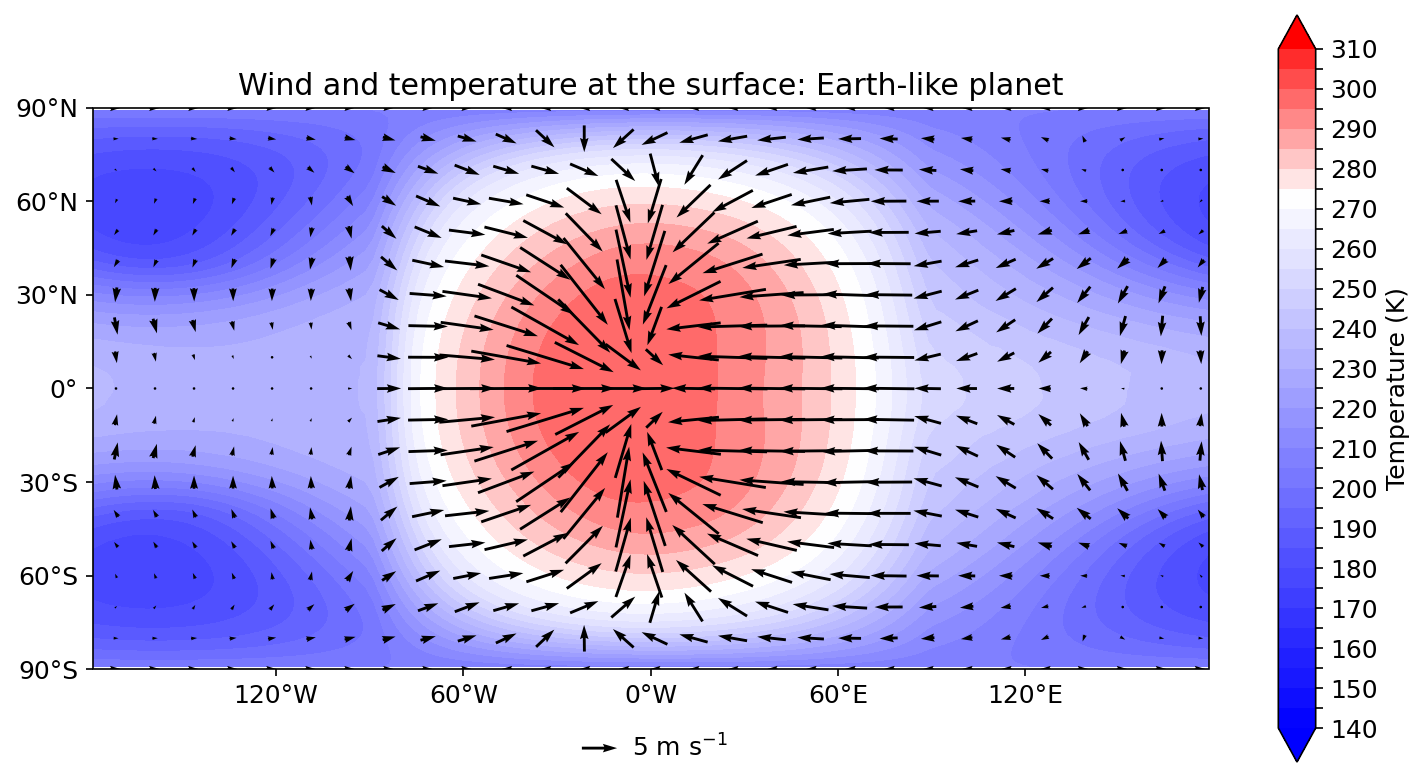

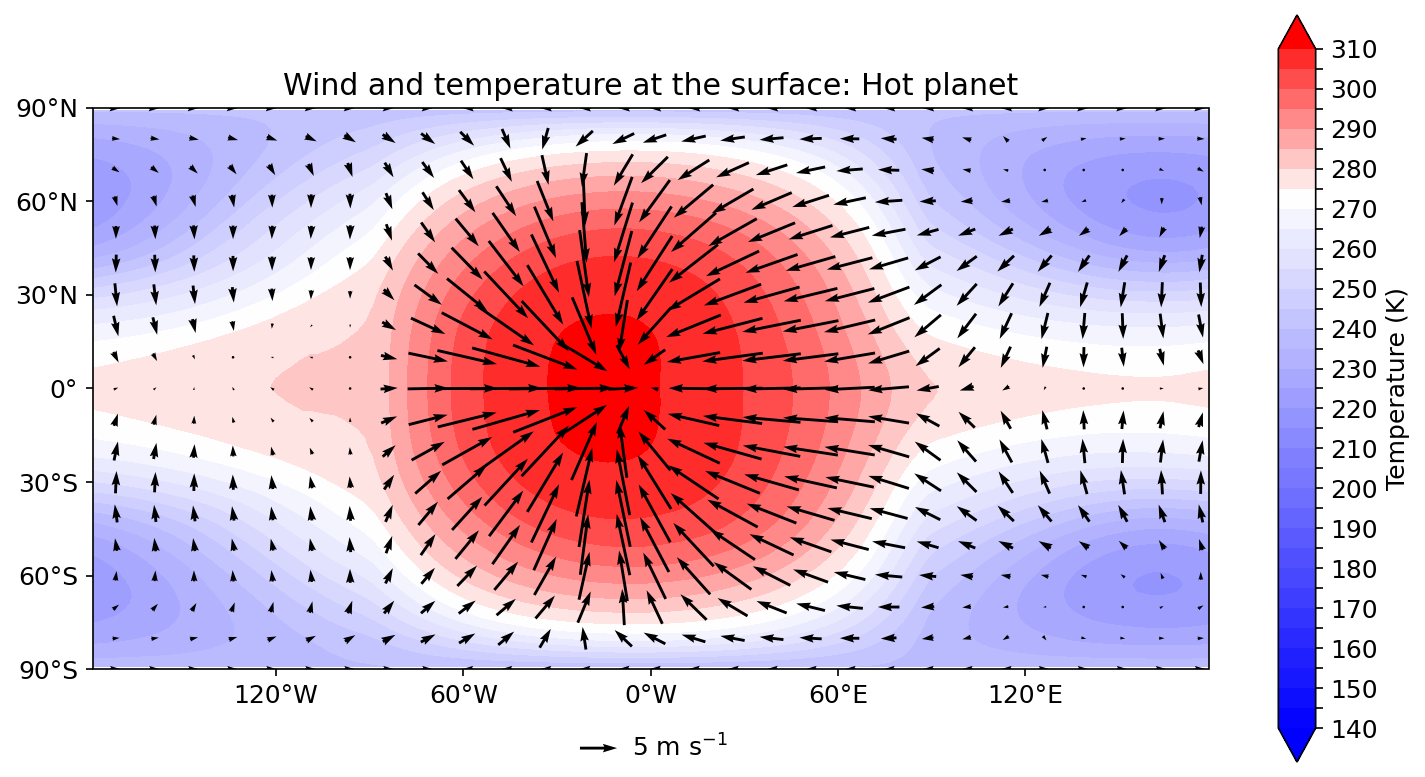

In [40]:
plot_surface_temp_wind_map(dry_cold_cube[:,0,:,:].collapsed('t',iris.analysis.MEAN),cold_uwind_regrid[:,0,:,:].collapsed('t',iris.analysis.MEAN),cold_vwind[:,0,:,:].collapsed('t',iris.analysis.MEAN),'Wind and temperature at the surface: Cold planet',140,315,5)
plot_surface_temp_wind_map(earth_like_cube[:,0,:,:].collapsed('t',iris.analysis.MEAN),earth_uwind_regrid[:,0,:,:].collapsed('t',iris.analysis.MEAN),earth_vwind[:,0,:,:].collapsed('t',iris.analysis.MEAN),'Wind and temperature at the surface: Earth-like planet',140,315,5)
plot_surface_temp_wind_map(hot_cube[:,0,:,:].collapsed('t',iris.analysis.MEAN),hot_uwind_regrid[:,0,:,:].collapsed('t',iris.analysis.MEAN),hot_vwind[:,0,:,:].collapsed('t',iris.analysis.MEAN),'Wind and temperature at the surface: Hot planet',140,315,5)



In [7]:
np.shape(cold_uwind[:,0,:,:].collapsed('t',iris.analysis.MEAN))

/Users/livnorth/miniconda3/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 't', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 't'. Ignoring bounds.
  warnings.warn(


(90, 144)